In [3]:
import librosa
import numpy as np
import os
import pandas as pd
import soundfile
import sys
import joblib
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, fbeta_score,accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks 
from librosa import display   

%matplotlib inline

We define a function that takes a set of features per time frame and stack the mean so that the data becomes 1-Dimension.

In [4]:
def feature_to_1d(features):
    result = np.array([])
    mfcc = np.mean(features.T, axis=0)
    result = np.hstack((result, mfcc))
    return result

We import the binary files containing the original features (MFCCs, and Mel-Spectrogram) in 2D form, as well as the labels corresponding to each feature set.

In [5]:
#mel

f = open('IEMOCAP_Data/Data_10_sec/X_train_mel', 'rb')
X_train_mel = joblib.load(f)
f.close()
f = open('IEMOCAP_Data/Data_10_sec/X_test_mel', 'rb')
X_test_mel = joblib.load(f)
f.close()
f = open('IEMOCAP_Data/Data_10_sec/y_train_mel', 'rb')
y_train_mel = joblib.load(f)
f.close()
f = open('IEMOCAP_Data/Data_10_sec/y_test_mel', 'rb')
y_test_mel = joblib.load(f)
f.close()

#mfcc

f = open('IEMOCAP_Data/Data_10_sec/X_train_mfcc', 'rb')
X_train_mfcc = joblib.load(f)
f.close()
f = open('IEMOCAP_Data/Data_10_sec/X_test_mfcc', 'rb')
X_test_mfcc = joblib.load(f)
f.close()
f = open('IEMOCAP_Data/Data_10_sec/y_train_mfcc', 'rb')
y_train_mfcc = joblib.load(f)
f.close()
f = open('IEMOCAP_Data/Data_10_sec/y_test_mfcc', 'rb')
y_test_mfcc = joblib.load(f)
f.close()

# Angry Utterances

[Text(0.5, 1.0, 'Mel-Spectrogram')]

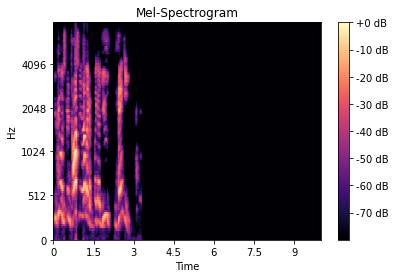

In [29]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[10], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')


In [21]:
y_test_mel[10]

0

[Text(0.5, 1.0, 'Mel-Spectrogram')]

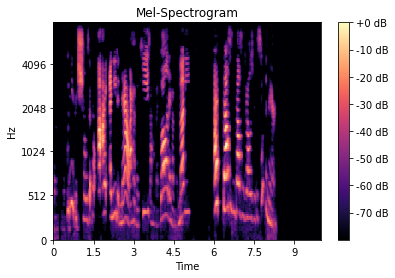

In [55]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[22], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')


In [56]:
y_test_mel[22]

0

[Text(0.5, 1.0, 'Mel-Spectrogram')]

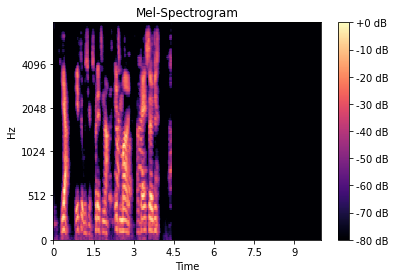

In [57]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[25], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [ ]:
y_test_mel[25]

# Happy 

[Text(0.5, 1.0, 'Mel-Spectrogram')]

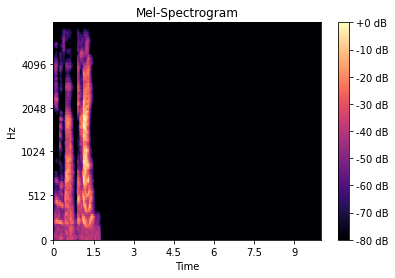

In [22]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[11], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [23]:
y_test_mel[11]

1

[Text(0.5, 1.0, 'Mel-Spectrogram')]

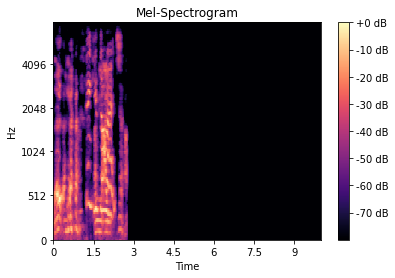

In [24]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[12], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [25]:
y_test_mel[12]

1

[Text(0.5, 1.0, 'Mel-Spectrogram')]

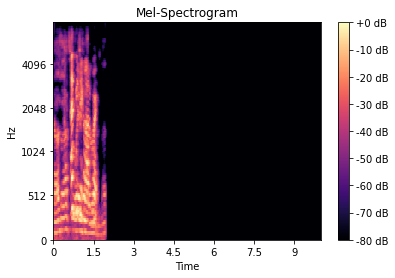

In [26]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[13], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [27]:
y_test_mel[13]

1

[Text(0.5, 1.0, 'Mel-Spectrogram')]

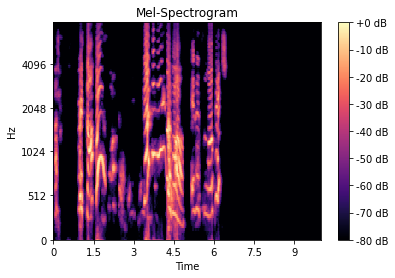

In [46]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[20], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [47]:
y_test_mel[20]

1

# Sad

[Text(0.5, 1.0, 'Mel-Spectrogram')]

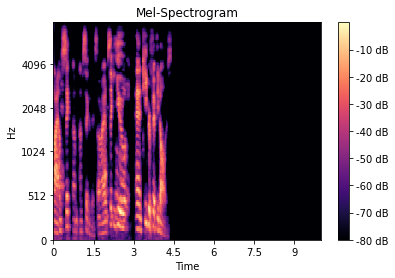

In [49]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[23], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [48]:
y_test_mel[23]

2

# Fear

[Text(0.5, 1.0, 'Mel-Spectrogram')]

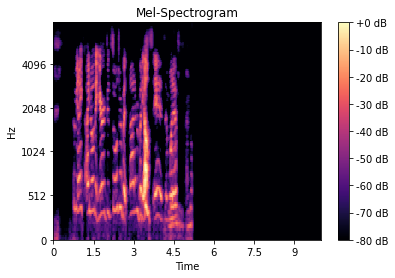

In [73]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[16], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [74]:
y_test_mel[16]

3

# Surprise

[Text(0.5, 1.0, 'Mel-Spectrogram')]

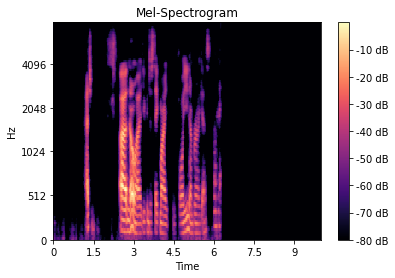

In [75]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[15], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [69]:
y_test_mel[15]

4

# Neutral

[Text(0.5, 1.0, 'Mel-Spectrogram')]

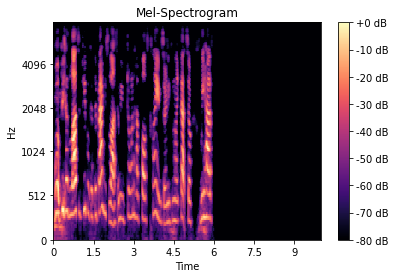

In [30]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[14], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [38]:
y_test_mel[14]

5

[Text(0.5, 1.0, 'Mel-Spectrogram')]

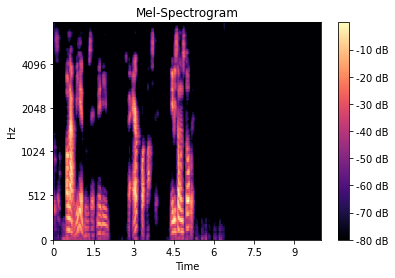

In [43]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[17], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [44]:
y_test_mel[17]

5

[Text(0.5, 1.0, 'Mel-Spectrogram')]

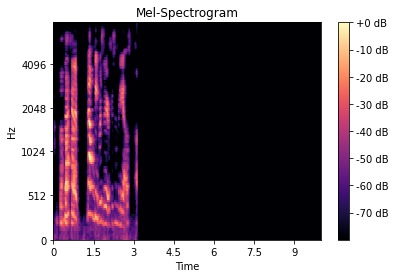

In [45]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[21], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [40]:
y_test_mel[21]

5

[Text(0.5, 1.0, 'Mel-Spectrogram')]

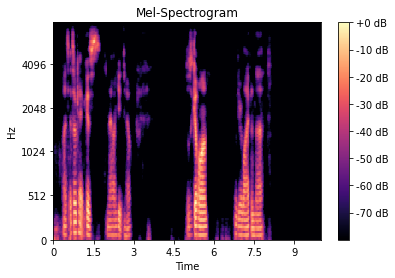

In [58]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[228], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram')

In [59]:
y_test_mel[228]

5

5

# Comparing a Happy vs Neutral Instance

[Text(0.5, 1.0, 'Mel-Spectrogram Happy')]

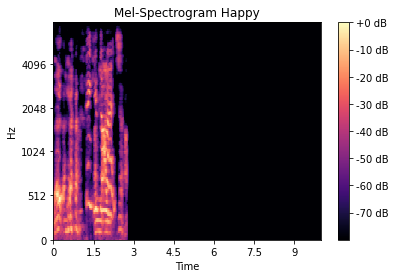

In [60]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[12], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram Happy')

[Text(0.5, 1.0, 'Mel-Spectrogram Neutral')]

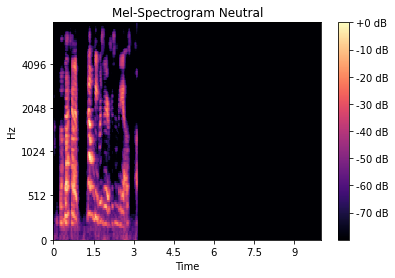

In [65]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[21], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram Neutral')

# Comparing with Sad

[Text(0.5, 1.0, 'Mel-Spectrogram')]

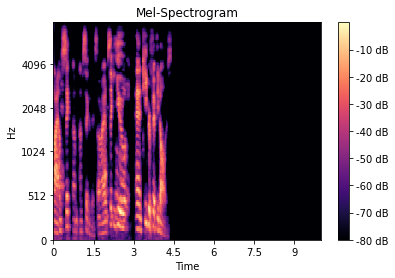

In [67]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(X_test_mel[23], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=16000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-Spectrogram Sad')